In [29]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [30]:
file_path = r"D:\Python\PP2 Coffee shop sales\Coffee Shop Sales.xlsx"

In [31]:
df = pd.read_excel(file_path)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


## Check duplicated/NA/NULL values

In [33]:
df.duplicated().any()

False

In [34]:
pd.DataFrame({'count': df.shape[0], 'NA': df.isna().sum(), 'NULL': df.isnull().sum()})

,count,NA,NULL
transaction_id,149116,0,0
transaction_date,149116,0,0
transaction_time,149116,0,0
transaction_qty,149116,0,0
store_id,149116,0,0
store_location,149116,0,0
product_id,149116,0,0
unit_price,149116,0,0
product_category,149116,0,0
product_type,149116,0,0


In [35]:
# Add new column showing Total check
df['Total check'] = df['transaction_qty'] * df['unit_price']

In [36]:
# Add new columns Year/Month/Day/Hour 
df['Month'] = df['transaction_date'].dt.month_name()
df['Day'] = df['transaction_date'].dt.day_name()
df['Hour'] = df['transaction_time'].apply(lambda x : x.hour)

In [37]:
df.sample(5)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Total check,Month,Day,Hour
39101,39208,2023-03-09,08:14:57,1,3,Astoria,75,3.50,Bakery,Pastry,Croissant,3.50,March,Thursday,8
137422,137759,2023-06-20,16:14:48,2,5,Lower Manhattan,30,3.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Lg,6.00,June,Tuesday,16
1542,1543,2023-01-03,16:37:59,2,8,Hell's Kitchen,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,4.00,January,Tuesday,16
72324,72494,2023-04-21,10:19:23,2,3,Astoria,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,April,Friday,10
25652,25709,2023-02-15,10:21:31,1,8,Hell's Kitchen,72,3.25,Bakery,Scone,Ginger Scone,3.25,February,Wednesday,10


## Compare revenue in each store and qty items was selling

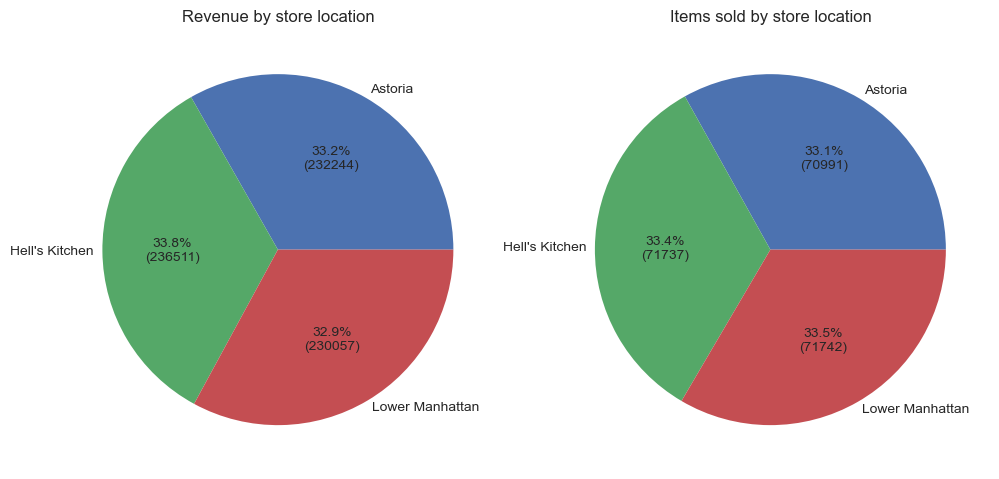

In [38]:
revenue_by_location = df.groupby('store_location')['Total check'].sum()
items_sold = df.groupby('store_location')['transaction_qty'].sum()

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val:d})'
    return my_format
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
fig.tight_layout()
ax[0].pie(revenue_by_location, labels=revenue_by_location.index, autopct=autopct_format(revenue_by_location),
         labeldistance=1.05)
ax[0].set_title('Revenue by store location')
ax[1].pie(items_sold, labels=items_sold.index, autopct=autopct_format(items_sold),
          labeldistance=1.05)
ax[1].set_title('Items sold by store location')
plt.show()

## Stacked plot chart show total selling and differences of customer behavior on each store on long period of time

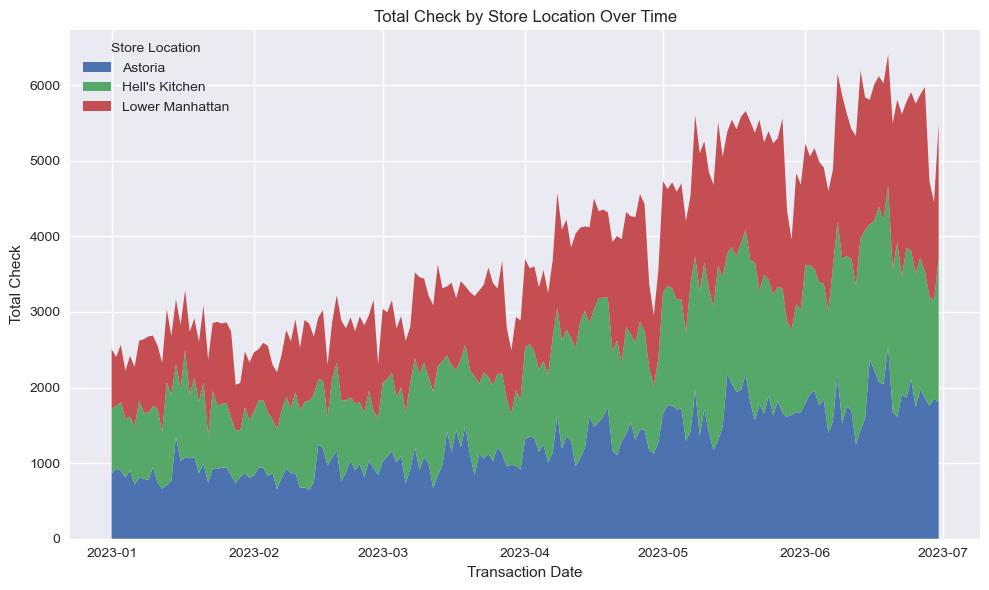

In [39]:
check_total = df.groupby(['transaction_date', 'store_location'])['Total check'].sum().unstack()
fig, ax = plt.subplots(figsize=(10, 6))

ax.stackplot(check_total.index, check_total.T, labels=check_total.columns)
ax.set_ylabel('Total Check')
ax.set_xlabel('Transaction Date')
ax.set_title('Total Check by Store Location Over Time')
ax.legend(loc='upper left', title='Store Location')
plt.tight_layout()
plt.show()

## Using stack bar we can see daily revenue on each shop.

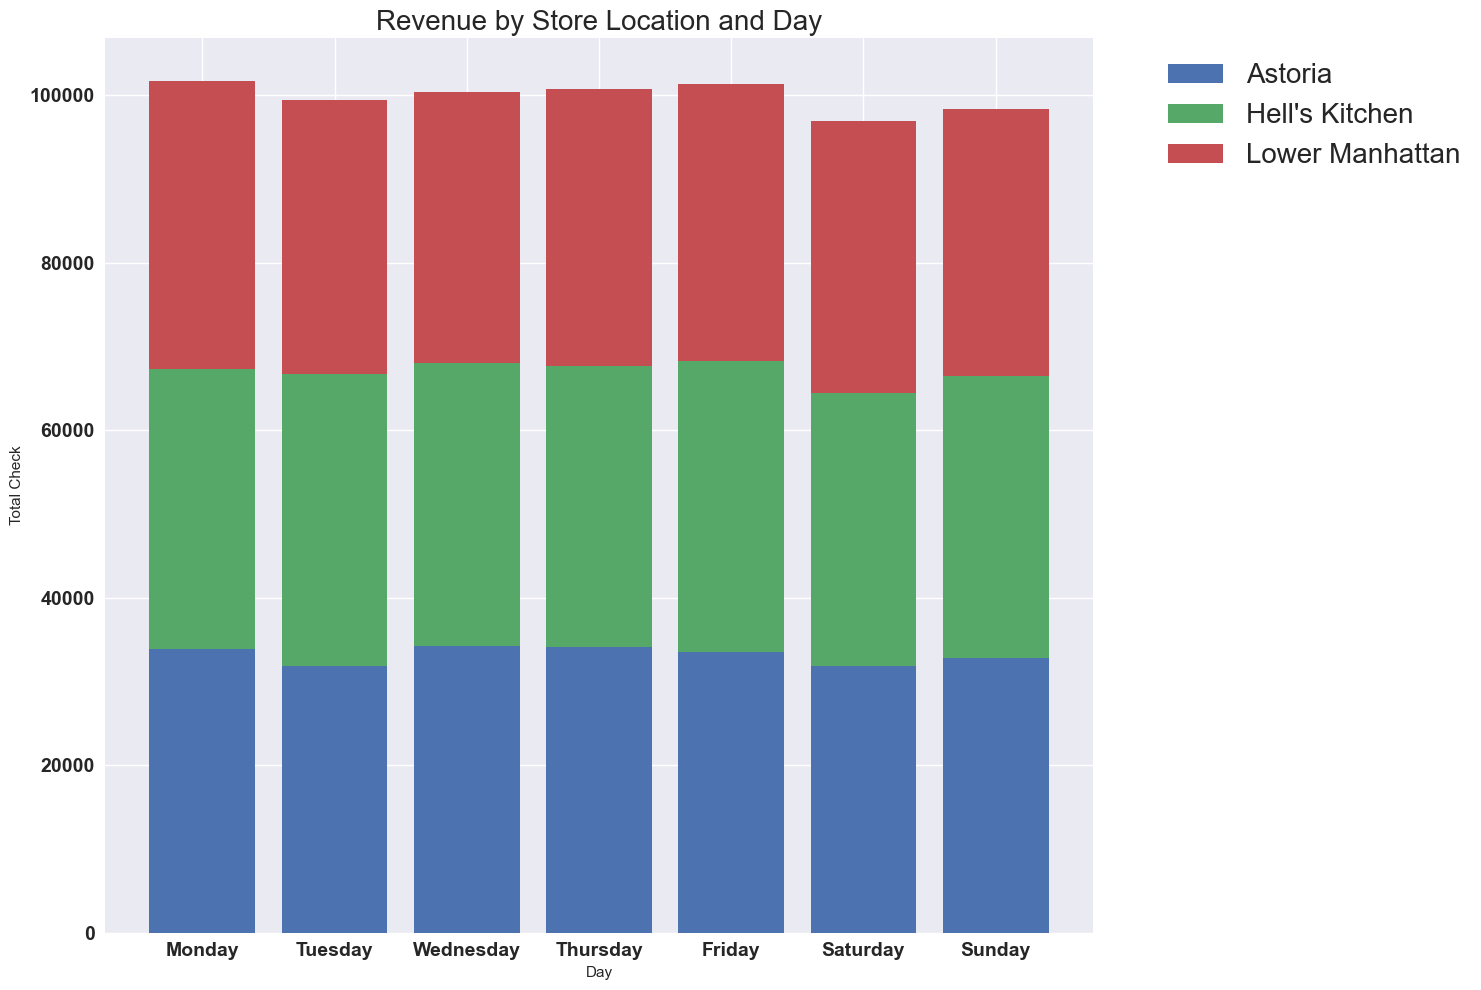

In [40]:
revenue_by_day = df.groupby(['Day', 'store_location'])['Total check'].sum().unstack()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
revenue_by_day = revenue_by_day.reindex(days_order)

fig, ax = plt.subplots(figsize=(15, 10))
bottom = None
for store in revenue_by_day.columns:
    ax.bar(revenue_by_day.index, revenue_by_day[store], bottom=bottom, label=store)
    if bottom is None:
        bottom = revenue_by_day[store]
    else:
        bottom += revenue_by_day[store]
ax.set_ylabel('Total Check')
ax.set_xlabel('Day')
ax.set_title('Revenue by Store Location and Day', fontsize="20")
ax.legend(bbox_to_anchor=(1.05, 1), fontsize="20", loc='upper left')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Histogram can help find out most busy hours for personal and advertising company.

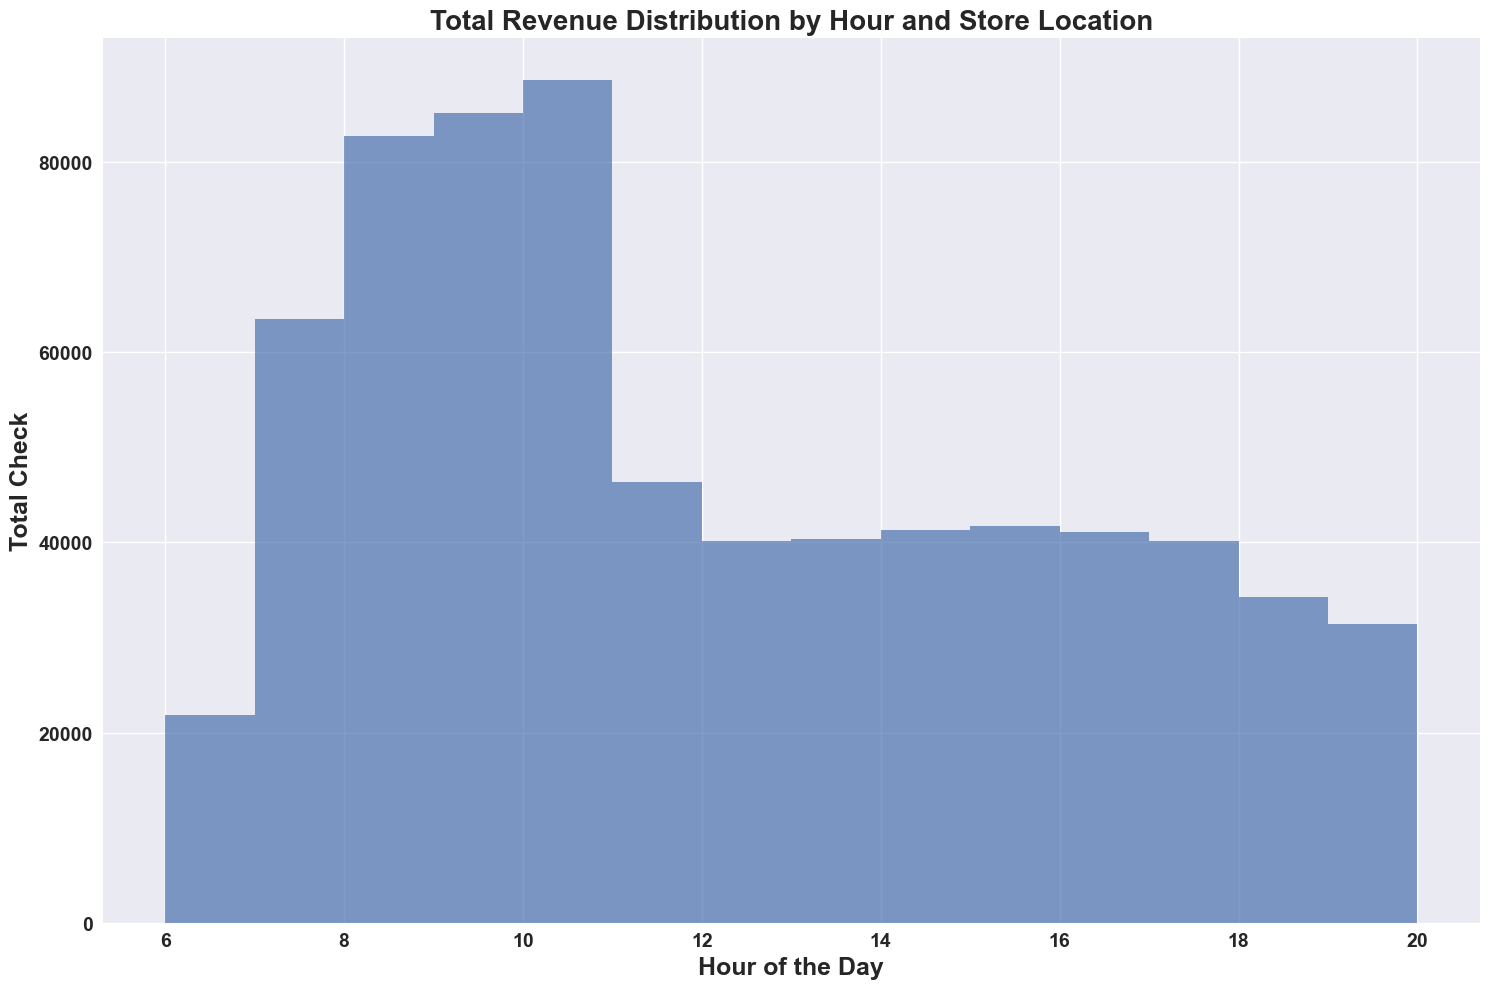

In [41]:
revenu_by_hour = df.groupby('Hour')['Total check'].sum()
revenu_by_hour.fillna(0, inplace=True)

bins = range(6, 21) 

fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(revenu_by_hour.index, weights=revenu_by_hour, bins=bins, alpha=0.7)
ax.set_ylabel('Total Check', fontsize=18, fontweight='bold')
ax.set_xlabel('Hour of the Day', fontsize=18, fontweight='bold')
ax.set_title('Total Revenue Distribution by Hour and Store Location', fontsize=20, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Key point of compering revenue and qty items sold is finding category which genarete more revenue for 1 item.
## In this case i'ts:
    - Coffee beans
    - Drinking Chocolate
    - Bakery

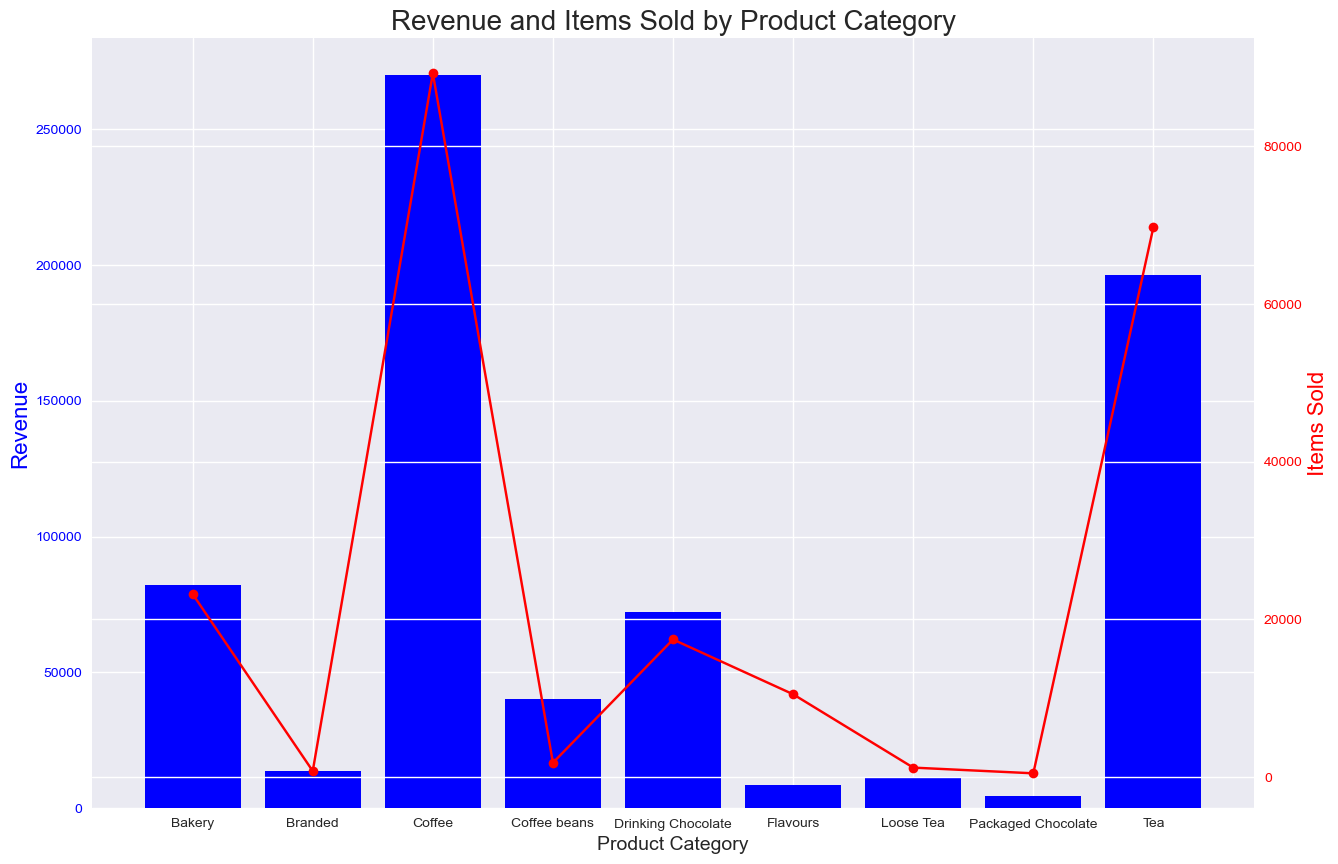

In [42]:
revenue_by_category = df.groupby('product_category')['Total check'].sum()
items_sold_by_category = df.groupby('product_category')['transaction_qty'].sum()
fig, ax1 = plt.subplots(figsize=(15, 10))

ax1.bar(x=revenue_by_category.index, height=revenue_by_category, color='blue')
ax1.set_xlabel('Product Category', fontsize=14)
ax1.set_ylabel('Revenue', color='blue', fontsize=16)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(revenue_by_category.index, items_sold_by_category, 'ro-')
ax2.set_ylabel('Items Sold', color='red', fontsize=16)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Revenue and Items Sold by Product Category', fontsize=20)
plt.show()

## Digging deeper we can compare sales of Flavours. As flavours it's additional item to coffee, selling more flavours increase your revenue with the same qty of Coffee sold.

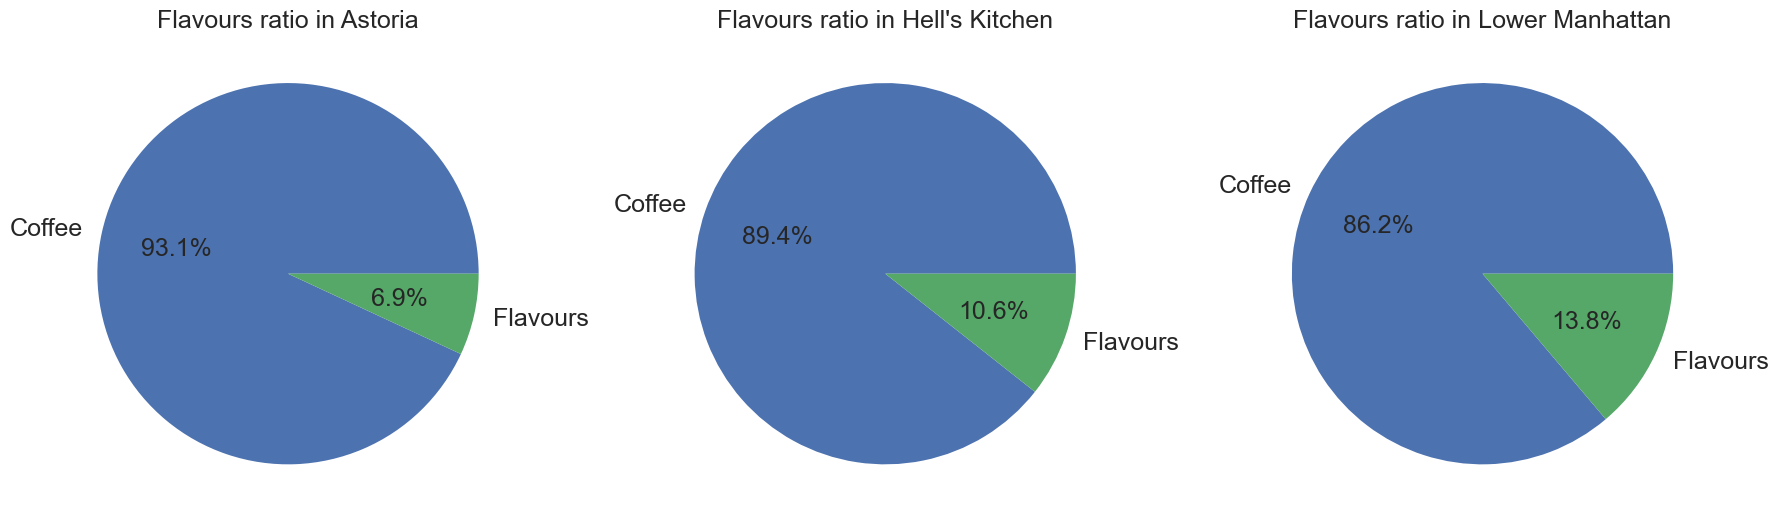

In [43]:
coffee_flavours_ratio = df.loc[df['product_category'].isin(['Coffee', 'Flavours'])]\
.groupby(['store_location', 'product_category'])['transaction_qty'].sum().reset_index().copy()
store_locations = coffee_flavours_ratio['store_location'].unique()

fig, axes = plt.subplots(1, len(store_locations), figsize=(18, 6))
for i, location in enumerate(store_locations):
    location_data = coffee_flavours_ratio[coffee_flavours_ratio['store_location'] == location]
    axes[i].pie(location_data['transaction_qty'], labels=location_data['product_category'], autopct='%1.1f%%',
                textprops={'fontsize': 18})  # Adjust fontsize here
    axes[i].set_title(f'Flavours ratio in {location}', fontsize=18)

plt.tight_layout()
plt.show() 

## To be continue...